# 📘 PCA on Image Data: A Hands-On Tutorial

## 🧠 What You'll Learn

In this notebook, we will explore **Principal Component Analysis (PCA)** — a powerful unsupervised technique used for **dimensionality reduction**, **feature extraction**, and **data compression**. PCA is especially useful when working with high-dimensional datasets like images.

Using the built-in **digits dataset** from `scikit-learn`, we'll apply PCA to:

- Visualize high-dimensional image data in a lower-dimensional space
- Understand the concept of **eigenfaces** (or "eigen-digits" in our case)
- Compress and **reconstruct images** using only the most important components
- Analyze how much **variance** is captured by each principal component

## 🛠️ Techniques Covered
- Standardizing input features
- Applying PCA for feature reduction
- Visualizing principal components
- Reconstructing images from compressed representations
- Plotting explained variance to evaluate dimensionality trade-offs

## 📦 Dataset
We'll be using the [`load_digits()`](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html) dataset, which contains 1,797 grayscale images of handwritten digits (0–9), each of size **8×8 pixels** (64 features).


In [1]:
# 📦1. Import Required Libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


Dataset shape: (1797, 64)


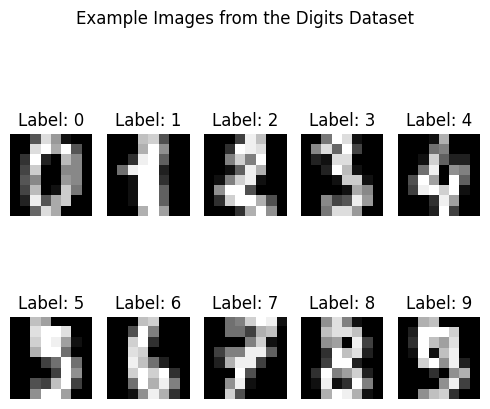

In [2]:
# 🧮  2. Load and Visualize the Dataset
# Load the digits dataset
digits = load_digits()
X = digits.data
y = digits.target
images = digits.images

print("Dataset shape:", X.shape)

# Display a few original images
fig, axes = plt.subplots(2, 5, figsize=(5, 5))
for i, ax in enumerate(axes.flat):
    ax.imshow(images[i], cmap='gray')
    ax.set_title(f"Label: {y[i]}")
    ax.axis('off')
plt.suptitle("Example Images from the Digits Dataset")
plt.tight_layout()
plt.show()

In [3]:
# ⚙️ 3. Standardize the Data
# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [4]:
# 📉 4. Apply PCA
# Apply PCA keeping 30 components
pca = PCA(n_components=30)
X_pca = pca.fit_transform(X_scaled)

print("Reduced shape:", X_pca.shape)

Reduced shape: (1797, 30)


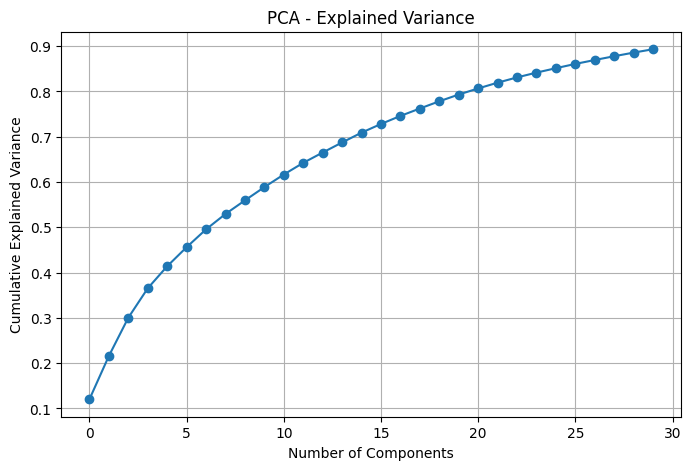

In [5]:
# 📊 5. Plot Explained Variance
# Cumulative explained variance plot
plt.figure(figsize=(8, 5))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA - Explained Variance')
plt.grid(True)
plt.show()

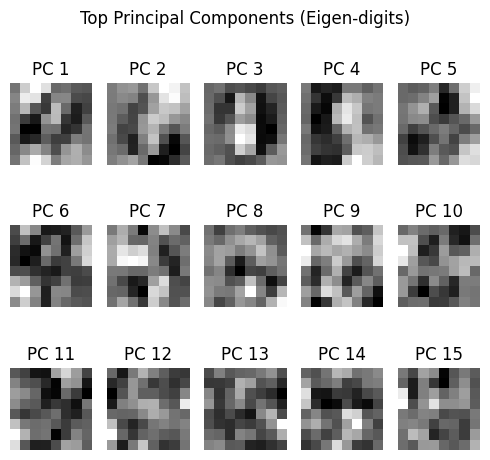

In [6]:
# 🖼️ 6. Visualize Principal Components (Eigen-digits)
# Reshape the components to display as images
eigen_digits = pca.components_.reshape((30, 8, 8))

# Plot first 15 eigen-digits
fig, axes = plt.subplots(3, 5, figsize=(5, 5))
for i, ax in enumerate(axes.flat):
    ax.imshow(eigen_digits[i], cmap='gray')
    ax.set_title(f"PC {i+1}")
    ax.axis('off')
plt.suptitle("Top Principal Components (Eigen-digits)")
plt.tight_layout()
plt.show()


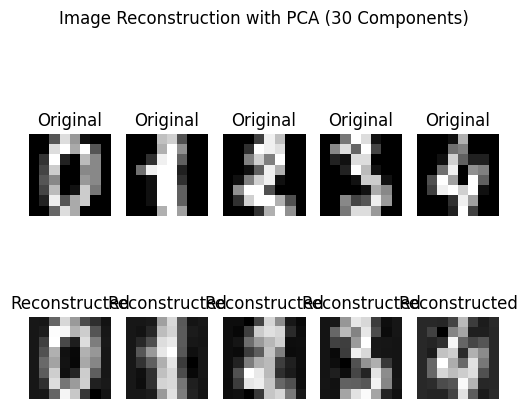

In [7]:
# 🔁 7. Reconstruct Images from PCA Components
# Reconstruct original images from PCA-reduced data
X_reconstructed = pca.inverse_transform(X_pca)
X_reconstructed_unscaled = scaler.inverse_transform(X_reconstructed)

# Show original vs reconstructed images
n = 5
fig, axes = plt.subplots(2, n, figsize=(5, 5))
for i in range(n):
    # Original image
    axes[0, i].imshow(X[i].reshape(8, 8), cmap='gray')
    axes[0, i].set_title("Original")
    axes[0, i].axis('off')

    # Reconstructed image
    axes[1, i].imshow(X_reconstructed_unscaled[i].reshape(8, 8), cmap='gray')
    axes[1, i].set_title("Reconstructed")
    axes[1, i].axis('off')

plt.suptitle("Image Reconstruction with PCA (30 Components)")
plt.tight_layout()
plt.show()


# ✅ 8. Summary
- PCA helps reduce the dimensionality of image data while preserving important patterns.
- Principal components ("eigen-digits") capture the most significant directions of variance.
- With just 30 components, we can reconstruct digits that visually resemble the originals.
- PCA is useful in compression, noise reduction, and as a preprocessing step for machine learning models.

👉 Try changing the number of components to see how it affects reconstruction quality!
